# World Happiness Report 2019 Analysis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [29]:
# Load the dataset
df = pd.read_csv('2019.csv')

# Display basic info
display(df.head())
print(df.info())

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


## 1. Top 10 Happiest Countries (Bar Chart)

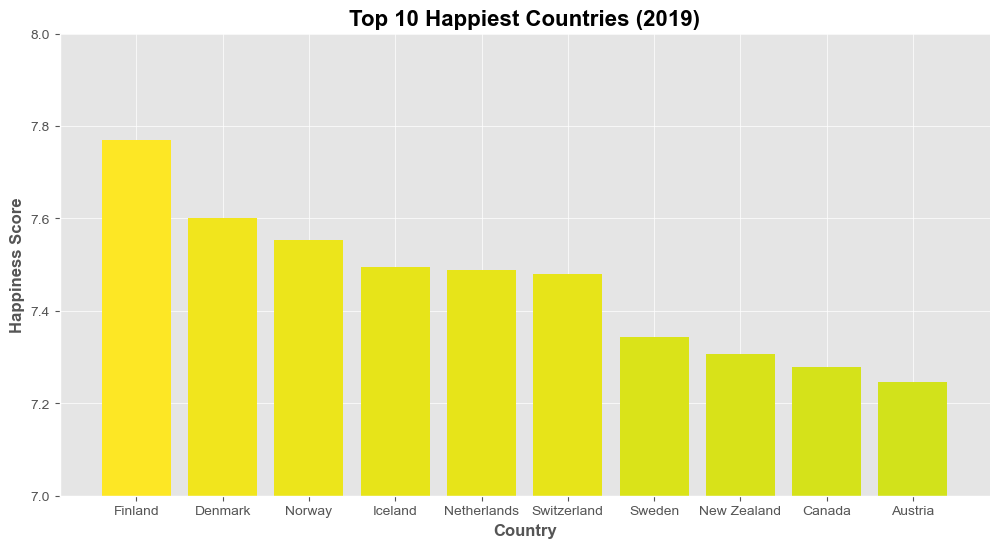

In [30]:
top_10 = df.head(10)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(top_10['Score'] / top_10['Score'].max())
plt.bar(top_10['Country or region'], top_10['Score'], color=colors)
plt.title('Top 10 Happiest Countries (2019)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.ylim(7, 8)
plt.show()

## 2. Happiness Breakdown (Stacked Bar Chart)

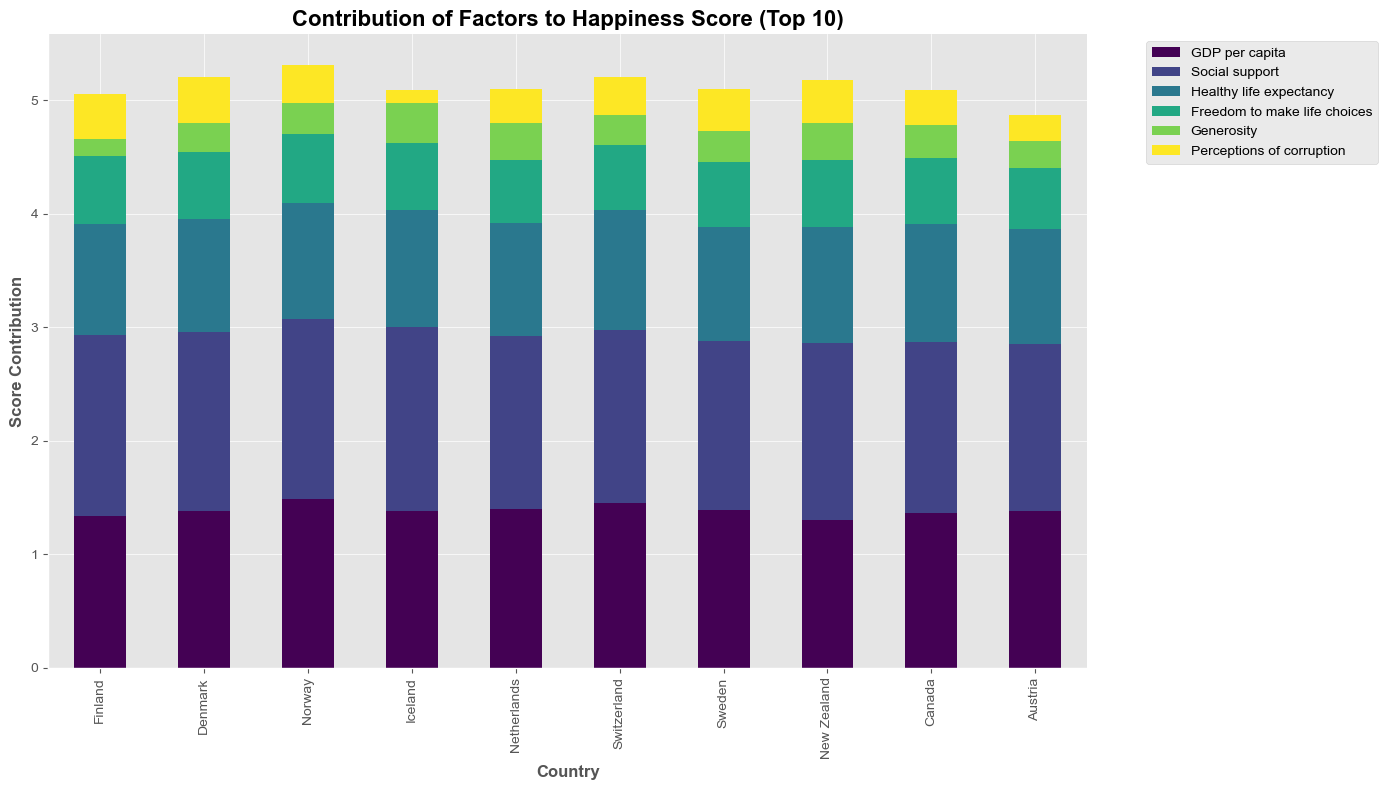

In [31]:
# Factors to visualize
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create data for top 10
top_10_factors = top_10.set_index('Country or region')[factors]

# Plot stacked bar
top_10_factors.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Contribution of Factors to Happiness Score (Top 10)', fontsize=16)
plt.ylabel('Score Contribution', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insight:** GDP and Social Support are consistently the largest contributors across the top nations.

## 3. Top 10 vs Bottom 10 (Horizontal Bar Chart)

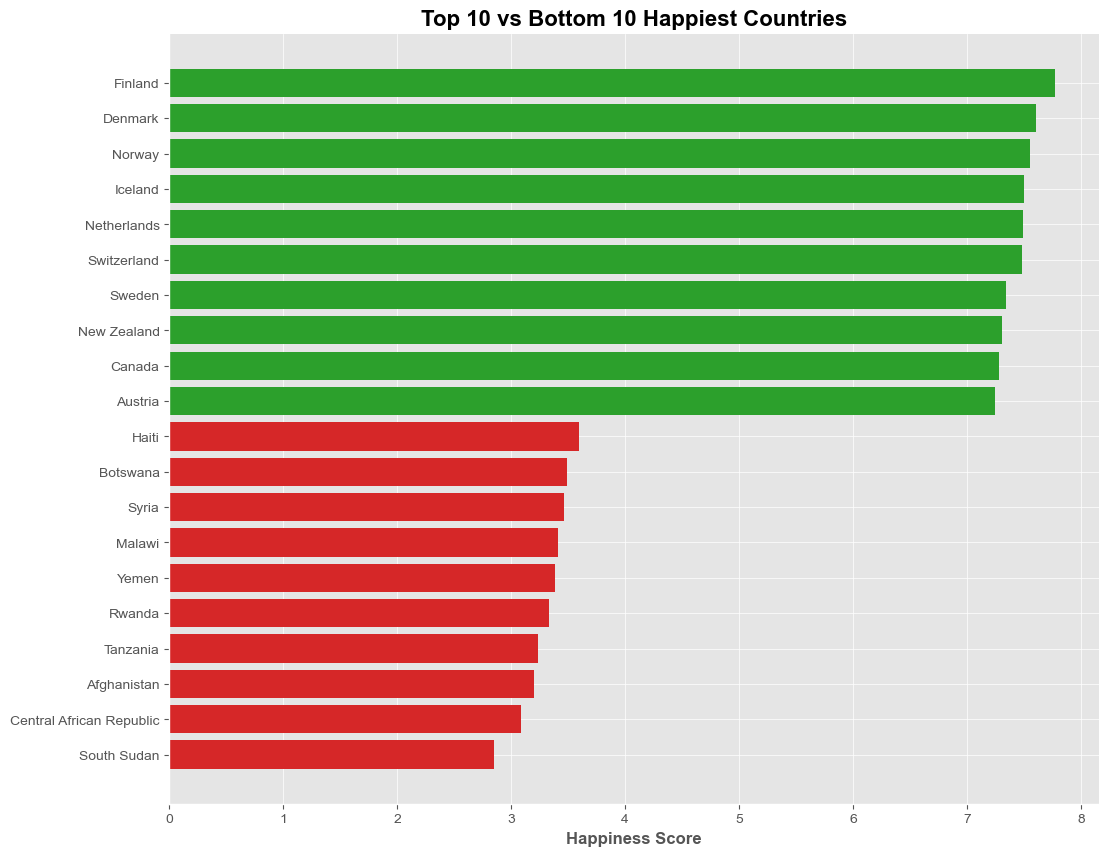

In [32]:
bottom_10 = df.tail(10)

# Combine top and bottom for comparison
comparison = pd.concat([top_10, bottom_10]).sort_values('Score')

plt.figure(figsize=(12, 10))
colors = ['#d62728' if x < 5 else '#2ca02c' for x in comparison['Score']]
plt.barh(comparison['Country or region'], comparison['Score'], color=colors)
plt.title('Top 10 vs Bottom 10 Happiest Countries', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.show()

## 4. Distribution of Numerical Factors (Box Plot)

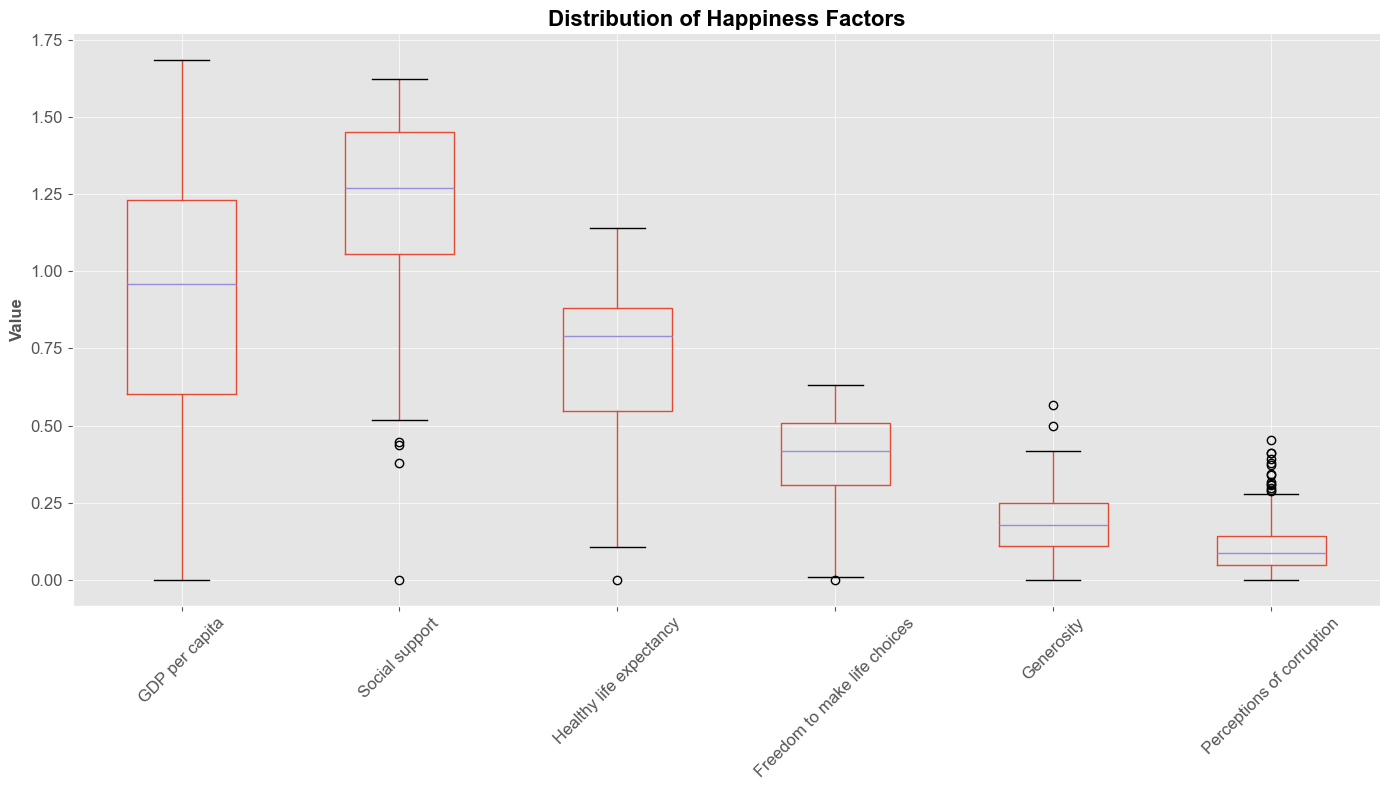

In [33]:
plt.figure(figsize=(14, 8))
df.boxplot(column=factors, rot=45, fontsize=12)
plt.title('Distribution of Happiness Factors', fontsize=16)
plt.ylabel('Value', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:** 'Social support' and 'GDP' have higher averages, while 'Generosity' and 'Corruption' are generally lower with some interesting outliers.

## 5. Correlation Heatmap

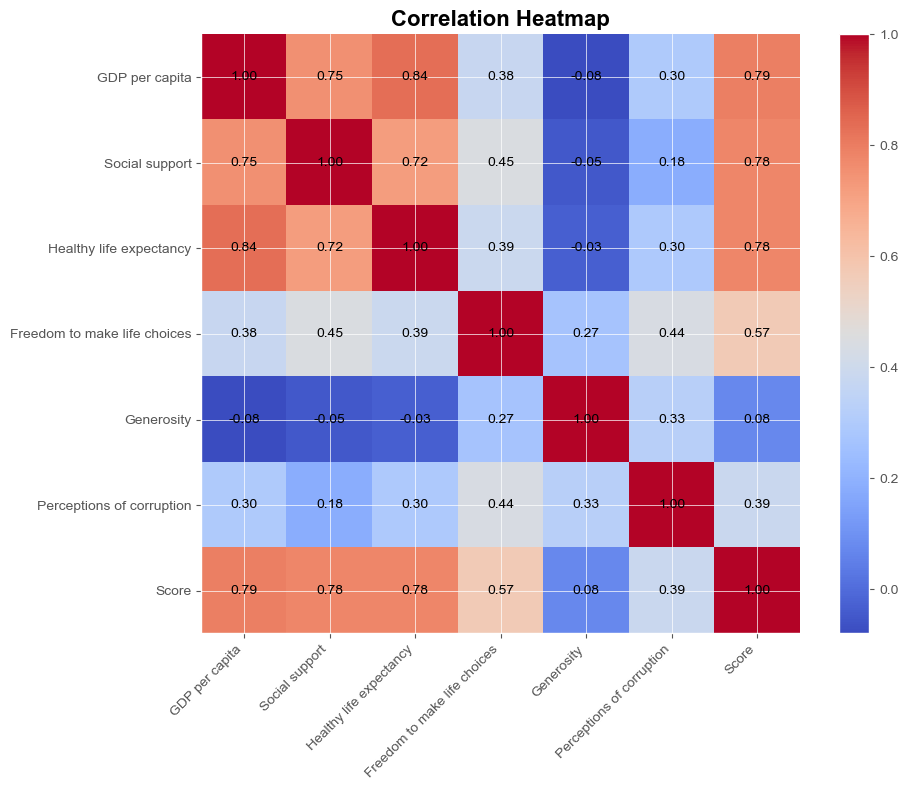

In [34]:
corr = df[factors + ['Score']].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr, cmap='coolwarm')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

# Loop over data dimensions and create text annotations.
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

**Insight:** GDP, Social Support, and Healthy Life Expectancy are positively correlated with each other and the Score.

## 6. Correlation Matrix (Scatter Matrix)

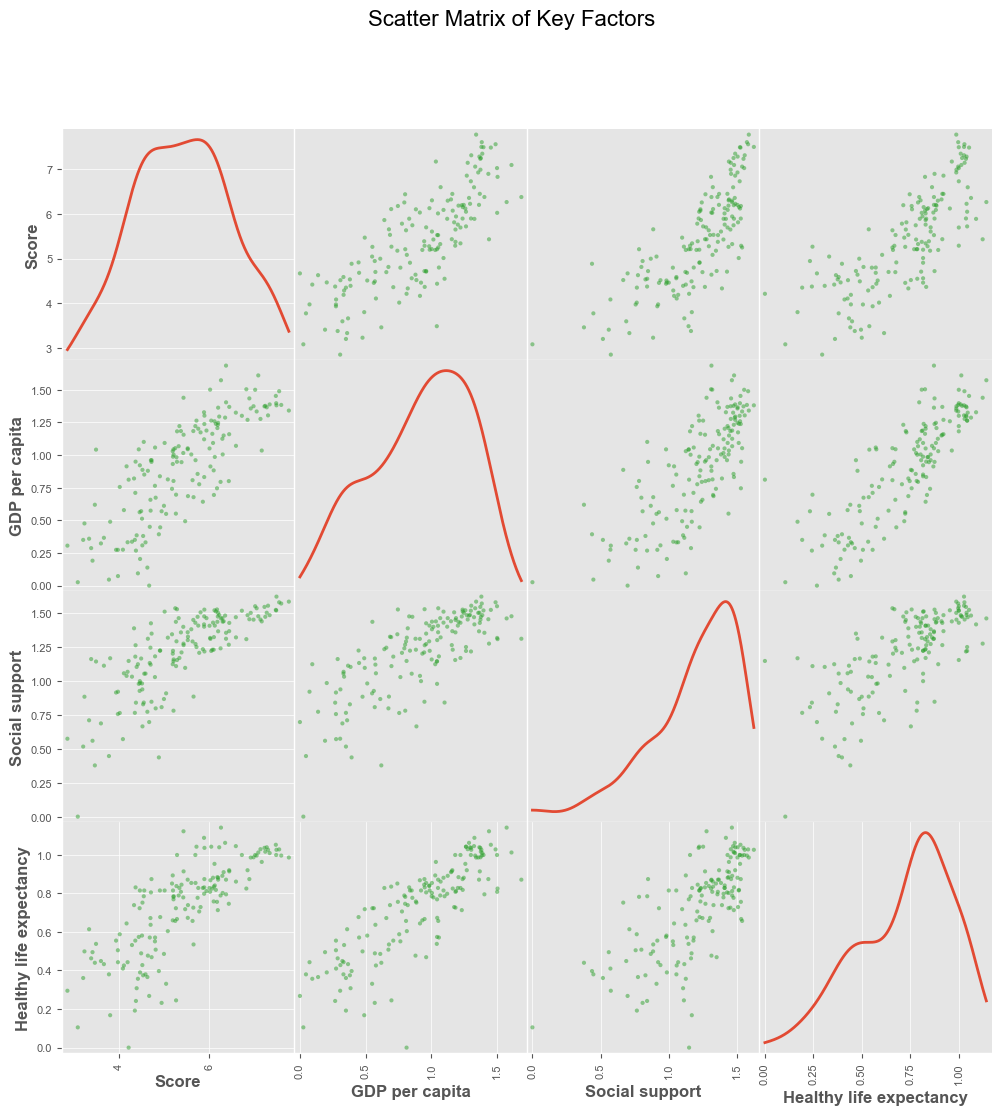

In [35]:
from pandas.plotting import scatter_matrix

attributes = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']
scatter_matrix(df[attributes], figsize=(12, 12), diagonal='kde', color='#2ca02c')
plt.suptitle('Scatter Matrix of Key Factors', fontsize=16)
plt.show()

**Insight:** Strong linear relationships are visible between Score and GDP, as well as Score and Healthy Life Expectancy.

## 7. GDP vs Happiness (Bubble Plot)

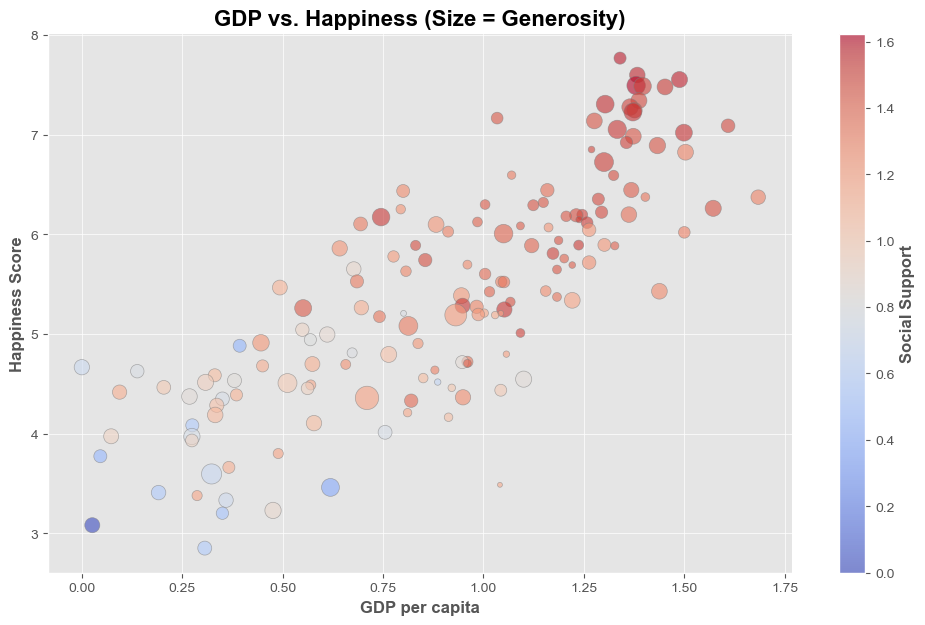

In [36]:
plt.figure(figsize=(12, 7))
plt.scatter(df['GDP per capita'], df['Score'], 
            s=df['Generosity']*500, 
            c=df['Social support'], 
            cmap='coolwarm', alpha=0.6, edgecolors='grey')

plt.colorbar(label='Social Support')
plt.title('GDP vs. Happiness (Size = Generosity)', fontsize=16)
plt.xlabel('GDP per capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.grid(True)
plt.show()

## 8. Parallel Coordinates Plot


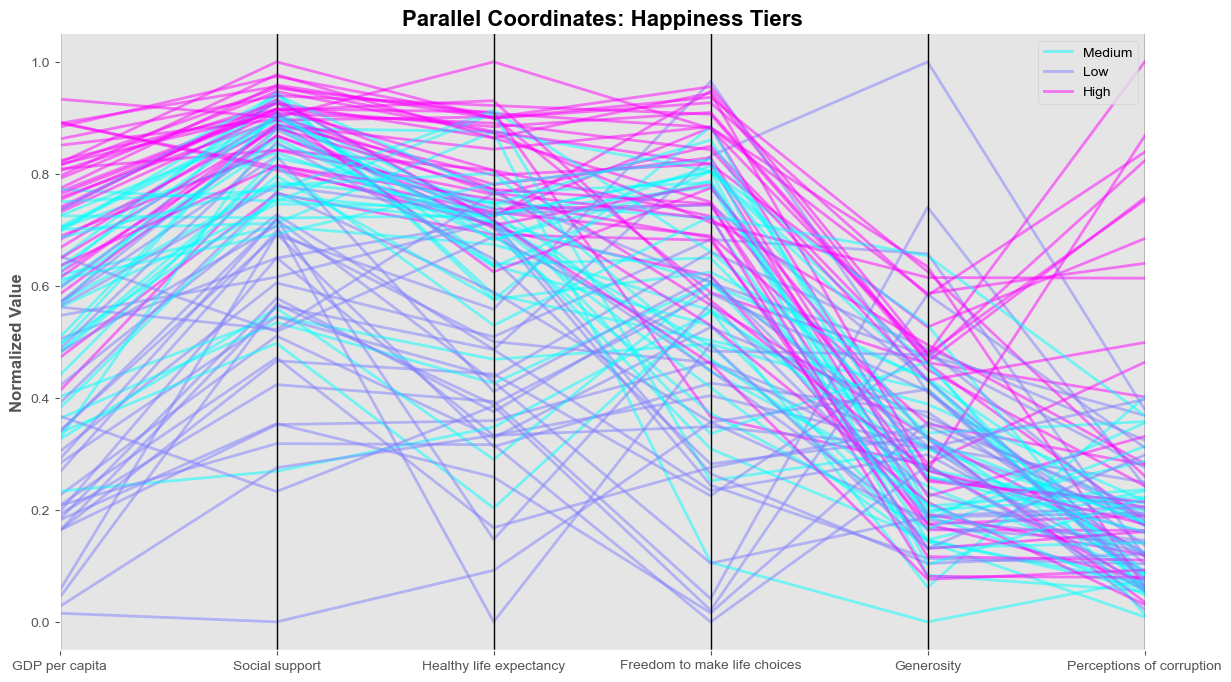

In [37]:
from pandas.plotting import parallel_coordinates

# Create a category column
df['Tier'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])

# Normalize function for better visualization
def normalize(x):
    return (x - x.min()) / (x.max() - x.min())

df_norm = df[factors].apply(normalize)
df_norm['Tier'] = df['Tier']

plt.figure(figsize=(14, 8))
parallel_coordinates(df_norm.sample(100), 'Tier', colormap='cool', alpha=0.5)
plt.title('Parallel Coordinates: Happiness Tiers', fontsize=16)
plt.ylabel('Normalized Value')
plt.show()